In [1]:
import math
from scipy import stats
from scipy.stats import norm

import numpy as np

from tqdm import tqdm

# for inline plots in jupyter
%matplotlib inline 
import matplotlib.pyplot as plt # import matplotlib

from IPython.display import Math, Latex # for latex equations
from IPython.core.display import Image # for displaying images

from statistics import mean # importing mean()

import seaborn as sns # import seaborn
sns.set(color_codes=True) # settings for seaborn plotting style

sns.set(rc={'figure.figsize':(15,5)}) # settings for seaborn plot sizes

In [2]:
def get_db(p, N):
    v = norm.rvs(size=N, loc=0, scale=1)
    z = norm.rvs(size=N, loc=0, scale=1)
    e = norm.rvs(size=N, loc=0, scale=1)
    x = p*z + v
    db = np.divide(z@e, z@x)
    return db
    

# 2

In [3]:
N = 400
rep_n = 10000
rho = [0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.1, 0.13, 0.16, 0.2, 0.25, 0.3, 0.4]

In [4]:
simulation = dict()
for p in tqdm(rho):
    simulation[str(p)] = [math.sqrt(N)*p*get_db(p=p, N=N) for i in list(range(1, rep_n+1))]

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:13<00:00,  1.01s/it]


In [5]:
def get_plot(p):
    data = simulation[str(p)]
    data_sorted = np.sort(data)
    prob = 1. * np.arange(len(data)) / (len(data) - 1)
    fig = plt.figure()
    ax = fig.add_subplot(122)
    ax.plot(data_sorted, prob)

    data = np.random.randn(10000)
    data_sorted = np.sort(data)
    prob = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted, prob)

    ax.legend(['rho='+str(p), 'Normal(0,1)'])

    plt.xlim(-4, 4)

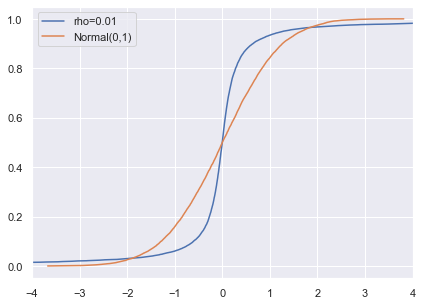

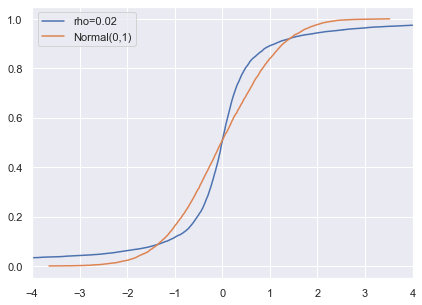

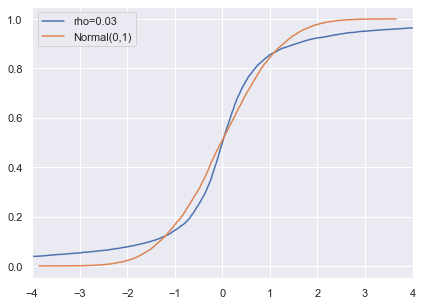

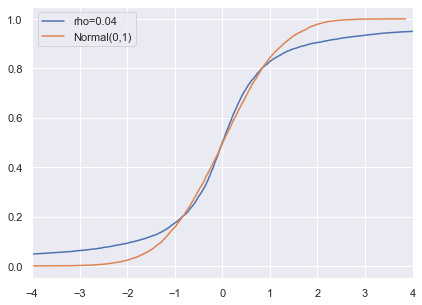

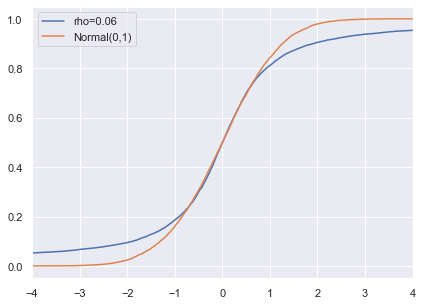

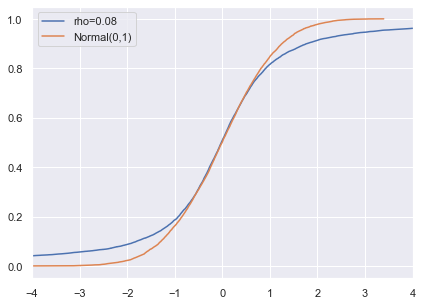

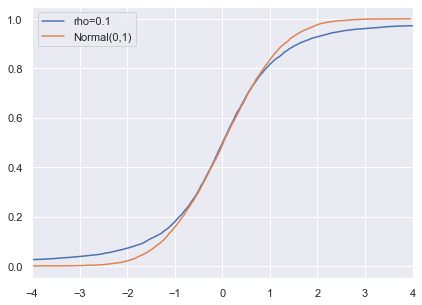

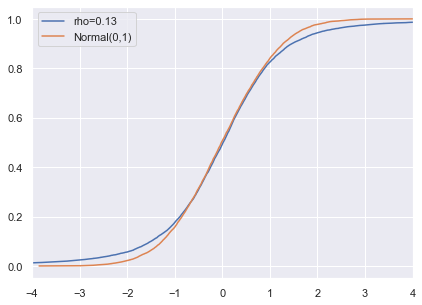

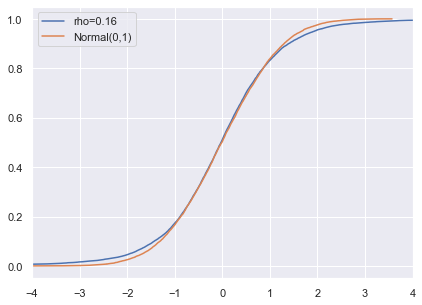

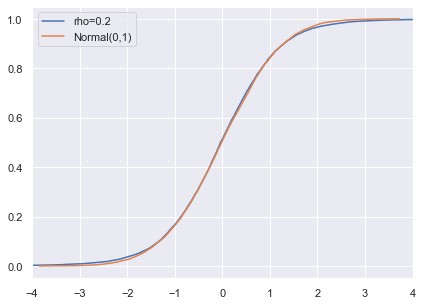

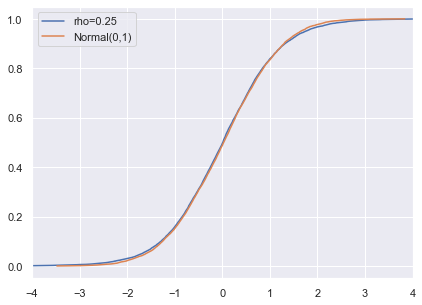

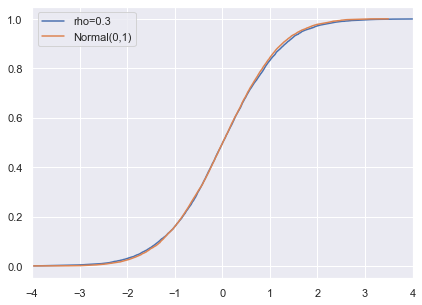

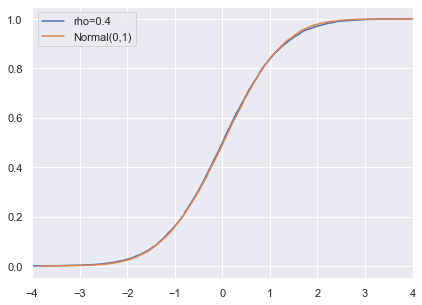

In [6]:
for p in rho:
    get_plot(p)

# 3 

In [15]:
Ns = [100, 400, 900]
Ks = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 7, 8]

In [16]:
simulation = dict()
for n in tqdm(Ns):
    for k in Ks:
        p = k/math.sqrt(n)
        simulation[(str(n), str(k))] = [get_db(p=p, N=n) for i in list(range(1, rep_n+1))]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:40<00:00, 13.52s/it]


In [17]:
def get_plot_3(k, n):
    data = simulation[(str(n), str(k))]
    data_sorted = np.sort(data)
    prob = 1. * np.arange(len(data)) / (len(data) - 1)
    fig = plt.figure()
    ax = fig.add_subplot(122)
    ax.plot(data_sorted, prob)

    data = np.random.randn(10000)
    data_sorted = np.sort(data)
    prob = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted, prob)

    ax.legend(['k='+str(k)+' & N='+str(n)+' & rho='+str(round(p,2)), 'Normal(0,1)'])

    plt.xlim(-4, 4)

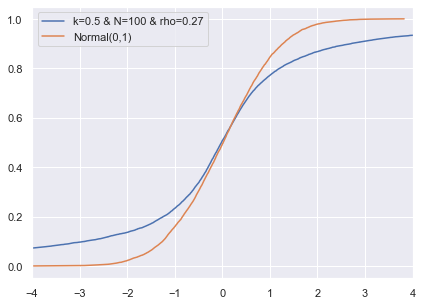

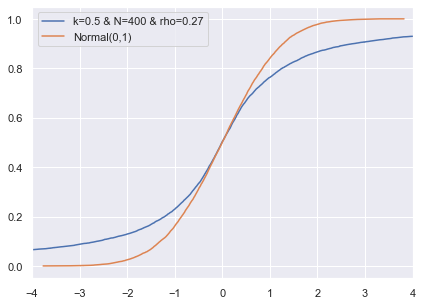

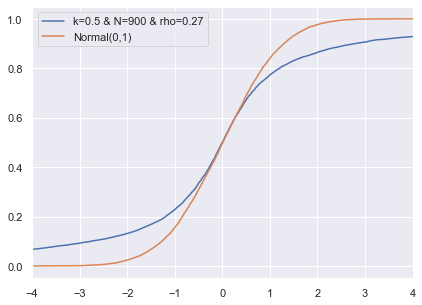

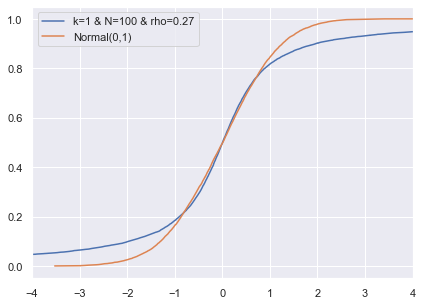

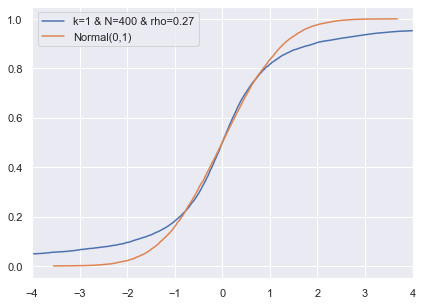

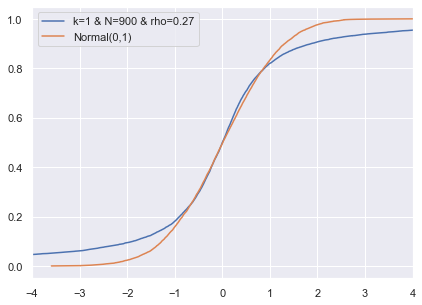

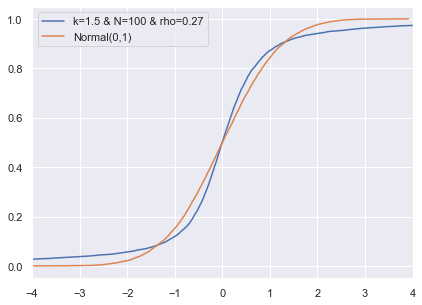

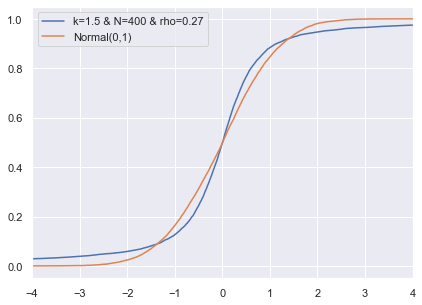

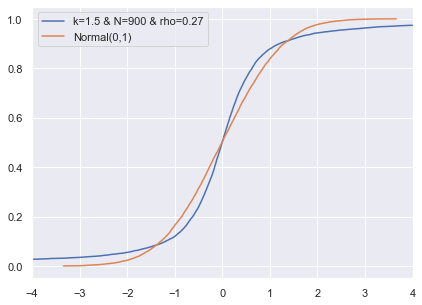

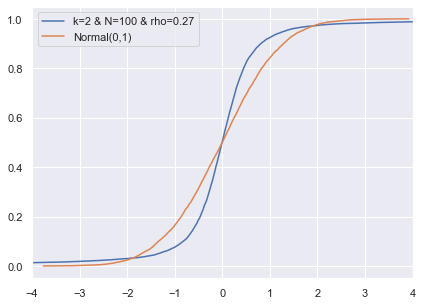

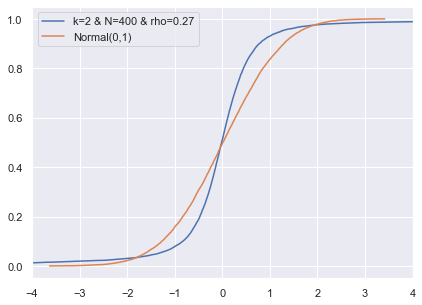

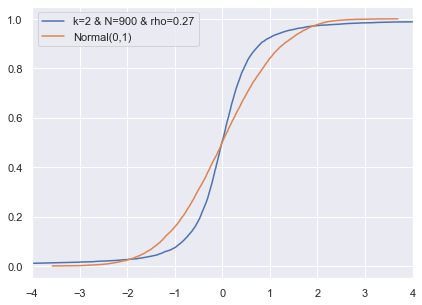

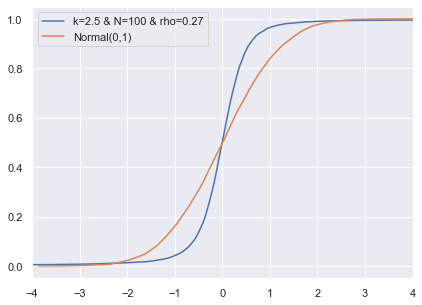

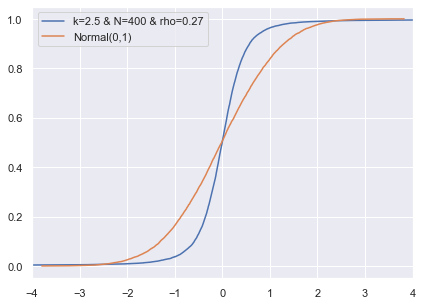

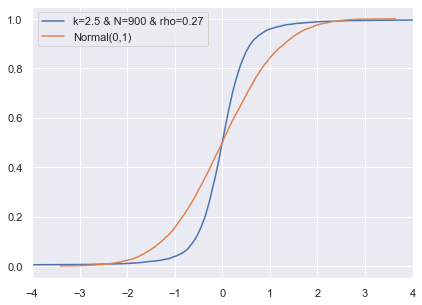

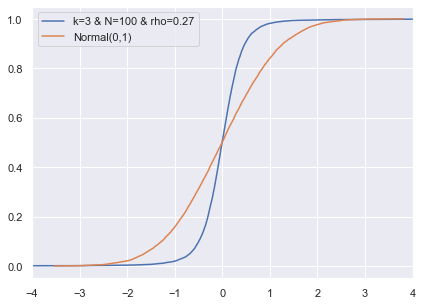

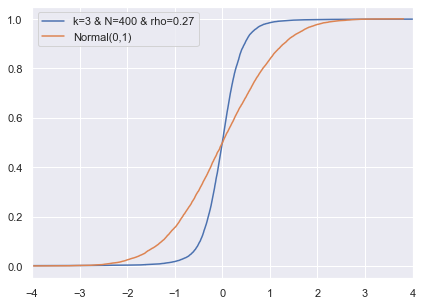

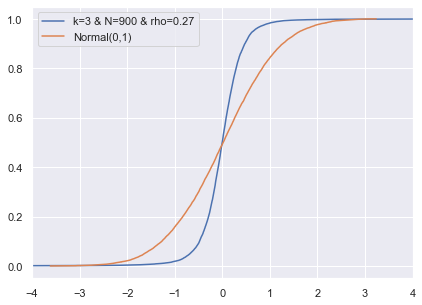

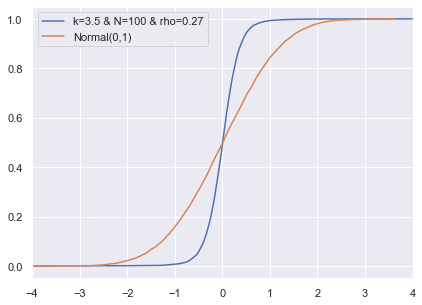

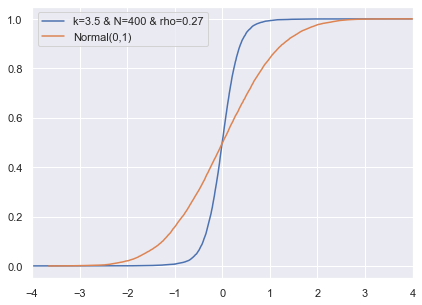

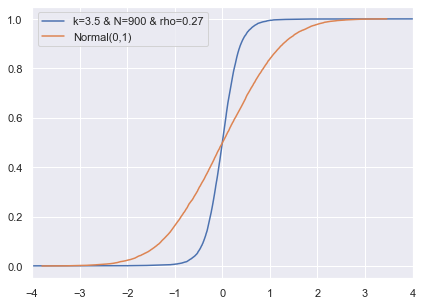

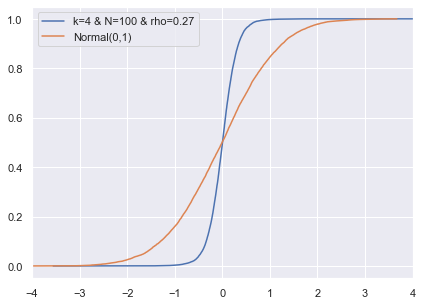

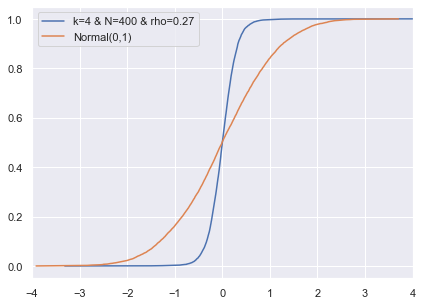

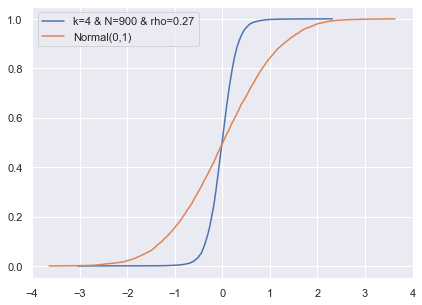

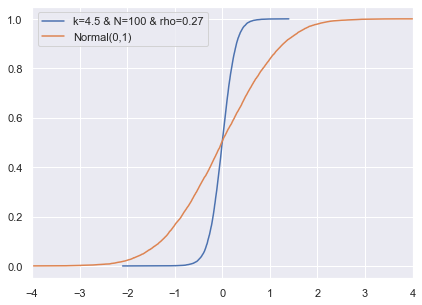

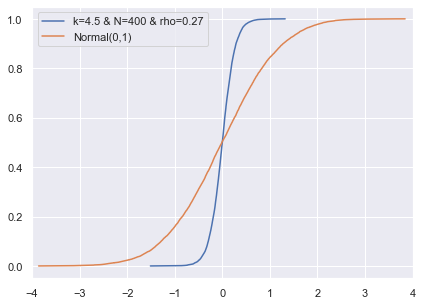

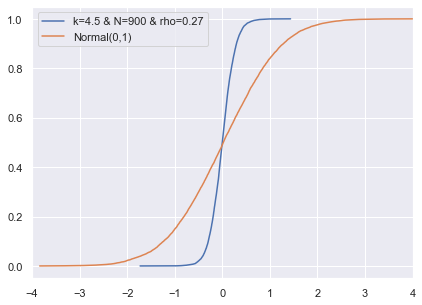

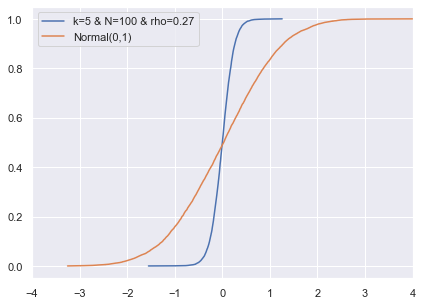

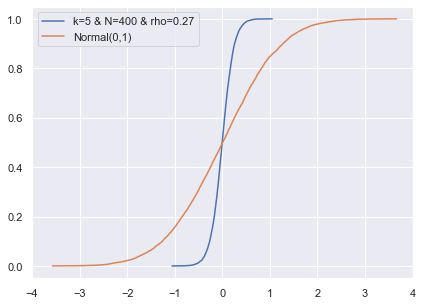

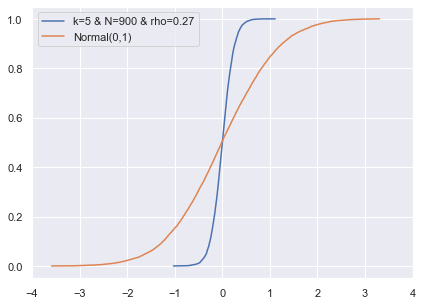

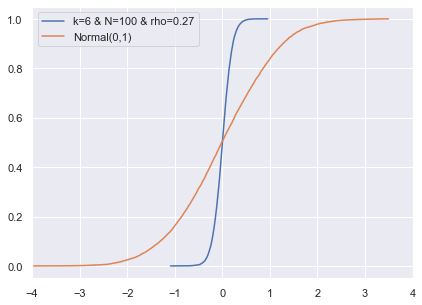

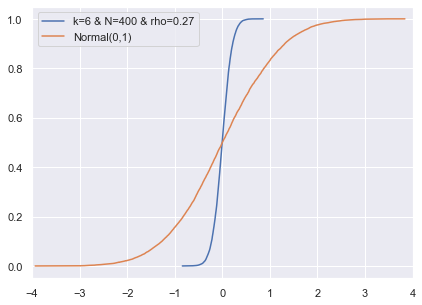

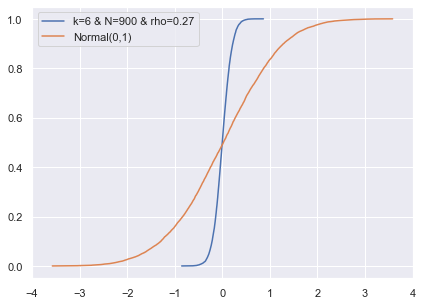

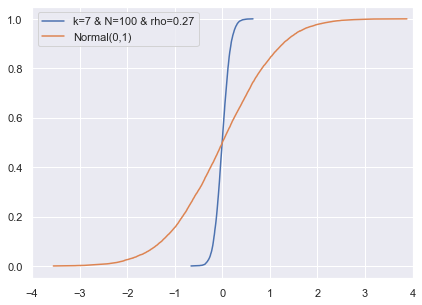

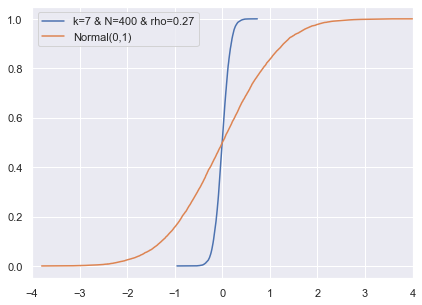

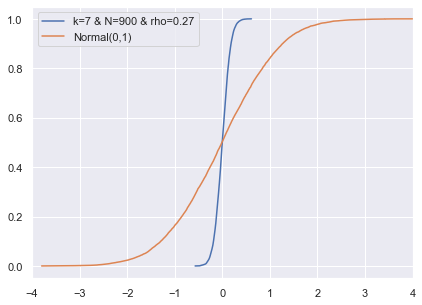

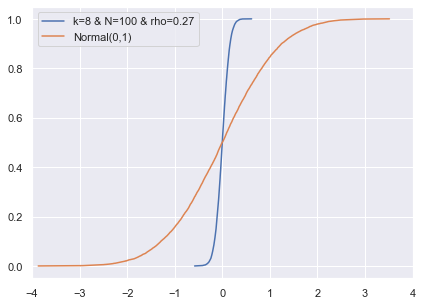

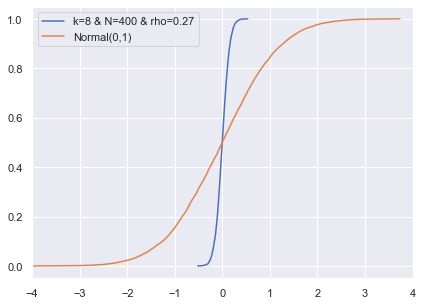

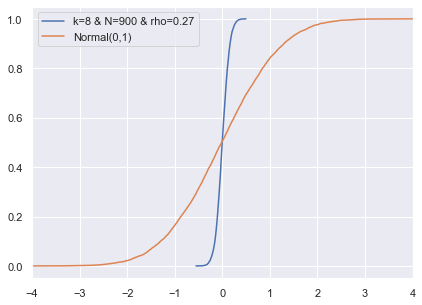

In [18]:
plt.rcParams.update({'figure.max_open_warning': 0})
for k in Ks:
    for n in Ns:
        get_plot_3(k, n)

# 4

In [11]:
Ns = [100, 400, 900]
Ks = [0.5, 1, 1.5, 2, 3, 4, 4.5]

In [12]:
def get_T(p, N):
    v = norm.rvs(size=N, loc=0, scale=1)
    z = norm.rvs(size=N, loc=0, scale=1)
    e = norm.rvs(size=N, loc=0, scale=1)
    x = p*z + v
    db = np.divide(z@e, z@x)
    T = z@x*db/math.sqrt(n)
    return T

In [13]:
simulation = dict()
for n in tqdm(Ns):
    for k in Ks:
        p = k/math.sqrt(n)
        simulation[(str(n), str(k))] = [get_T(p, n) for i in list(range(1, rep_n+1))]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:22<00:00,  7.65s/it]


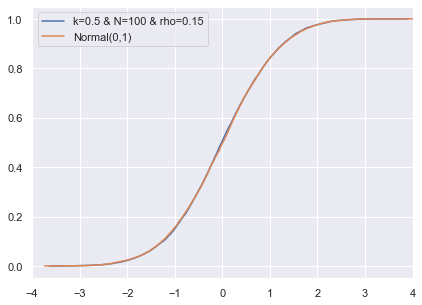

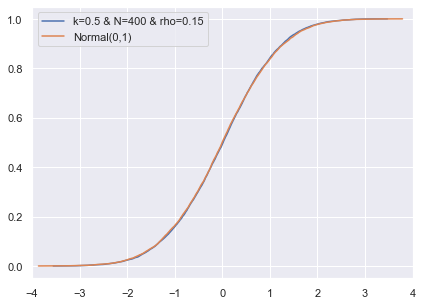

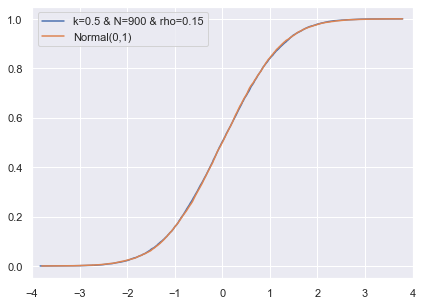

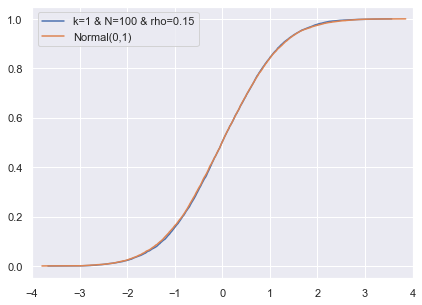

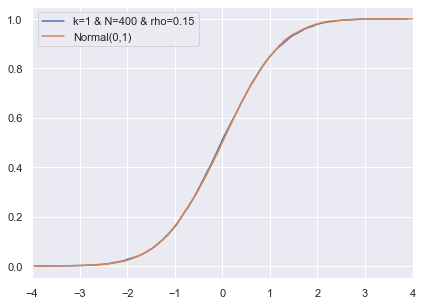

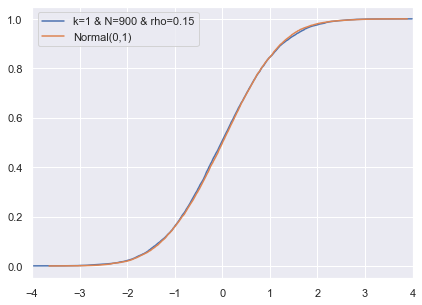

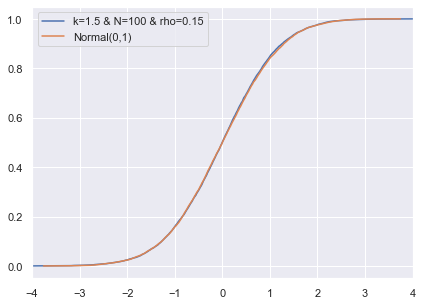

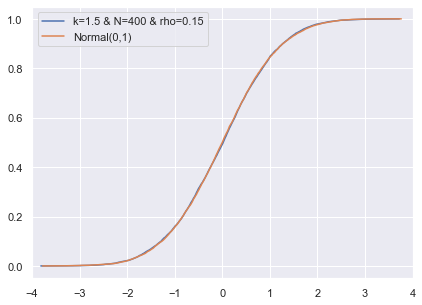

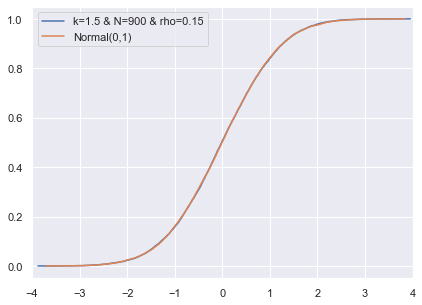

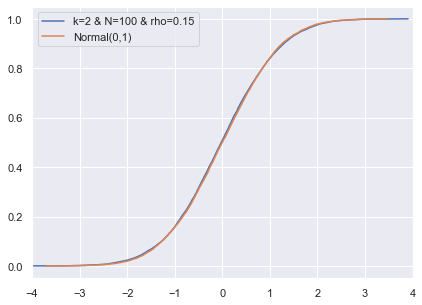

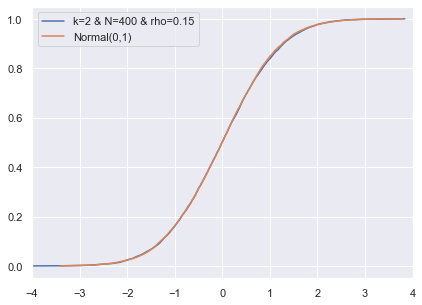

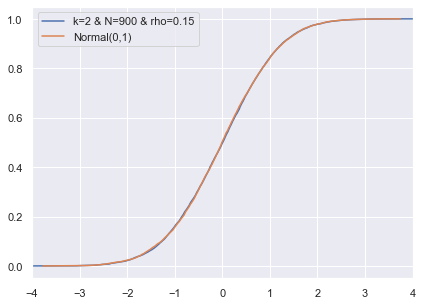

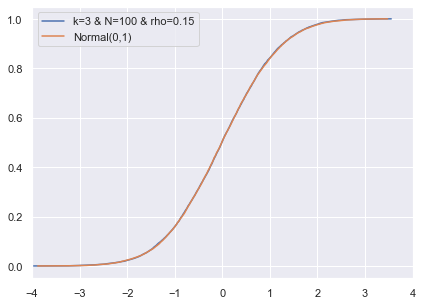

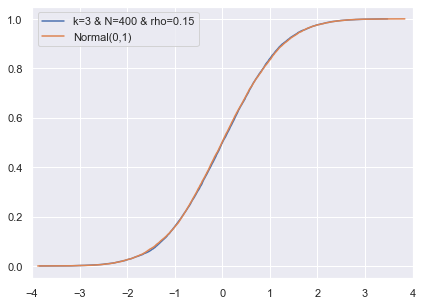

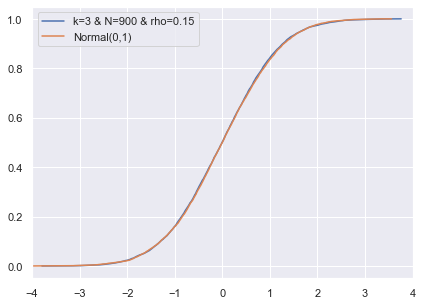

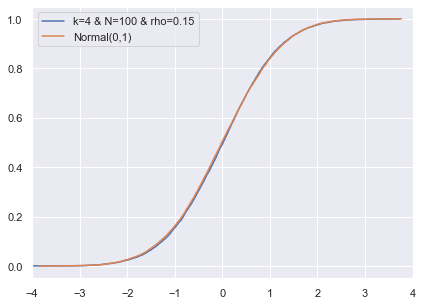

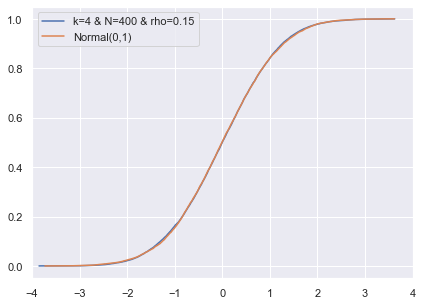

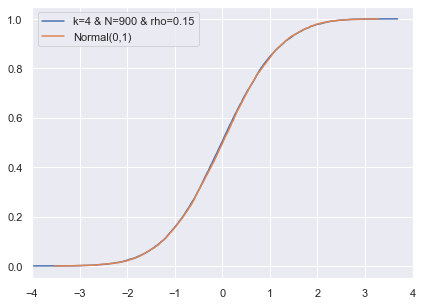

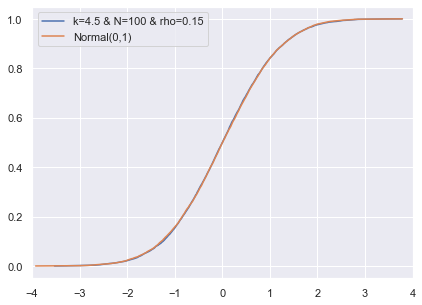

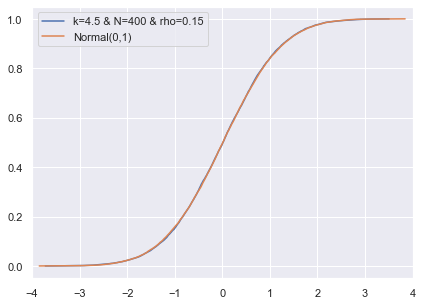

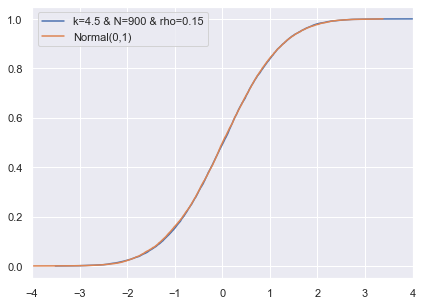

In [14]:
plt.rcParams.update({'figure.max_open_warning': 0})
for k in Ks:
    for n in Ns:
        get_plot_3(k, n)